# UCCD2063 Machine Learning Classification Assignment
The following is the Machine Learning algorithm designed to conduct classification tasks for multivariant attributes.

**Contributors:**
- Yee Zi Yang 18ACB02834
- Lee Wai Hin 18ACB02736
- Tan Jie Nan 18ACB02121

**Classification Dataset:**
- Firewall rules action on malicious data transfer

## Table of Content

### Contributor's Section:
1. [Wai Hin's Code](#waihin_section)
2. [Jie Nan's Code](#jienan_section)
3. [Sammy's Code](#sammy_section)


<div class="alert alert-block alert-info">
The following is still under development and currently in alpha testing phase.
</div>

## 1.0 Data Initialization

In [ ]:
#Library imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
print ('==> Loading specified dataset...\n')
firewall_data =  pd.read_csv("Firewall_data_sets.csv")
print ('==> Dataset loading completed.\n')


In [ ]:
firewall_data.head(5)

In [ ]:
firewall_data.info()

In [ ]:
firewall_data.describe()

In [ ]:
firewall_data.hist(bins=50,figsize=(20,15))
plt.show()

In [390]:
firewall_data.Action.value_counts()

allow         37640
deny          14987
drop          12851
reset-both       54
Name: Action, dtype: int64

In [ ]:
firewall_data.corr() #correlation

<a id="waihin_section"></a>
# WaiHin's Code Here
<hr>

In [ ]:
from sklearn.preprocessing import LabelBinarizer

lb_encoder = LabelBinarizer()
firewall_data.Action = lb_encoder.fit_transform(firewall_data.Action)
#firewall_data
#print(firewall_data.Action.value_counts().count)
#print(firewall_data.describe())
#print(type(firewall_data))
firewall_data.corr()


In [ ]:
type(firewall_data)

In [ ]:
firewall_data.describe()

In [ ]:
corr_matrix = firewall_data.corr()
corr_matrix['Action'].sort_values(ascending=False)

In [ ]:
#print('lala')
#from pandas.plotting import scatter_matrix
#print('lala')
#selected_cols = ['Source Port', 'Destination Port', 'NAT Source Port']
#print('lala')
#scatter_matrix(firewall_data[selected_cols], figsize=(12,8)) 
#print('lala')
#plt.show()
#print('lala')

# Data Preprocessing

In [ ]:
firewall_data.head(8)

In [ ]:
# write code to separate the output (y) from input (X)
X = firewall_data.drop('Action', axis = 1)
y = firewall_data['Action']

In [ ]:
# Import the necessary libraries first
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

#Feature extraction
test = SelectKBest(score_func=chi2, k=8)
fit = test.fit(X, y)

#Summarize scores
np.set_printoptions(precision = 5)
print(fit.scores_)

features = fit.transform(X)

#Summarize selected features
print(features[0:8, :])


In [ ]:
X = firewall_data.drop(['Elapsed Time (sec)', 'pkts_sent', 'pkts_received', 'Action'], axis =1)

In [ ]:
print('Shape of original dataset, train', firewall_data.shape)
print('X: shape=', X.shape, 'type=', type(X))
print('y: shape=', y.shape, 'type=', type(y))
print(y)

In [ ]:
X.isnull().sum()

In [ ]:
y.isnull().sum()

In [ ]:
X = X.values
y = y.values
print(type(X))
print(type(y))

In [ ]:
# Your code here

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=30)

print('full set shape =', X.shape)
print('train shape=', X_train.shape)
print('test shape=', X_test.shape)


In [ ]:
print(type(X_train))
print(type(X_test))
print(type(y_train))
print(type(y_test))

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)

In [ ]:
print(X_train.mean (axis = 0))
print(X_train.std (axis = 0))

print('>>> Mean of all columns:\n', X_train.mean())
print('\n>>> Std of all columns:\n', X_train.std())

In [ ]:
print('Possible values of Action:\n', lb_encoder.classes_)

In [ ]:
print('X_train shape: ', X_train.shape)
print(type(y_train))
print('y_train shape: ', y_train.shape)

In [ ]:
from sklearn.tree import DecisionTreeRegressor 
from sklearn.metrics import mean_squared_error
#create a instance of DecisionTreeRegressor
#tree_reg = ?
tree_reg = DecisionTreeRegressor()

#Train the regressor model
tree_reg.fit(X_train, y_train)

#Predict on training set using trained regressor
y_pred = tree_reg.predict(X_train)

#Show the result of 10 random samples
def show10results(y_train, y_pred):
    print('Result for the 10 random samples: ')
    selected = np.random.randint(0, len(y_train), 10)
    for i in selected:
        print('actual = {:7.0f} pred ={:7.0f}'.format(y_train[i], y_pred[i]))


show10results(y_train, y_pred)

#Compute and show the RMSE on training set
tree_mse = mean_squared_error(y_pred, y_train)
tree_rmse = np.sqrt(tree_mse)
print('RMSE = ', tree_rmse)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# create a instance of RandomForestRegressor
# forest_reg = ?
forest_reg = RandomForestRegressor(n_estimators=10, random_state=42)

# Train the regressor model
forest_reg.fit (X_train, y_train)

# Predict on training set using trained regressor
y_pred = forest_reg.predict(X_train)
# Show the result of 10 random samples
def show10results(y_train, y_pred):
    print('Result for the 10 random samples:')
    selected = np.random.randint(0, len(y_train), 10)
    for i in selected:
        print('actual = {:7.0f} pred ={:7.0f}'.format(y_train[i], y_pred[i]))

show10results(y_train, y_pred)


# Compute and show the RMSE on training set
forest_mse = mean_squared_error(y_pred, y_train)
forest_rmse= np.sqrt(forest_mse)
print('RMSE =', forest_rmse)

In [ ]:
firewall_data.Action.mean()

# Evaluating 

In [ ]:
from sklearn.model_selection import cross_val_score

def display_scores(scores):
    print('Scores: ', scores, '\n')
    print('Mean: ', scores.mean())
    print('Standard deviation: ', scores.std())
# perform k-fold cross-out validation
# use cross_val_score on tree_reg
k_fold_scores = cross_val_score(tree_reg, X_train, y_train, scoring = 'neg_mean_squared_error', cv = 5)

# convert NMSE to RMSE
tree_rmse_scores = np.sqrt(-k_fold_scores)

# use display_scores to show the results
display_scores(tree_rmse_scores)

In [ ]:
# use cross_val_score on forest_reg

k_fold_scores = cross_val_score(forest_reg, X_train, y_train, scoring ='neg_mean_squared_error', cv=5)

# covert NMSE to RMSE
forest_rmse_scores = np.sqrt(-k_fold_scores)

# use display_scores to show the results
display_scores(forest_rmse_scores)

# SGD classifier

### Training an action model

In [ ]:
# import the SGD from sklearn

from sklearn.linear_model import SGDClassifier

# Train using the training set
sgd_clf = SGDClassifier (random_state = 42, max_iter = 5, tol = None)
sgd_clf.fit(X_train, y_train)

### Performing predictions

In [ ]:
y_pred_sgd = sgd_clf.predict(X_train)
y_pred_sgd

#### Detection result for some randomly generated samples

In [ ]:
def peek_results(actual, predicted, num = 20):
    print('actual | Predicted')
    print('------------------')
    for i in range(num):
        sel = np.random.randint(0, len(y_train))
        print(actual[sel], ' | ', predicted[sel])

peek_results(y_train, y_pred_sgd)

### Performance measure: Accuracy

In [ ]:
from sklearn.metrics import accuracy_score

# compute accuracy using accuracy_score and show the result
train_acc = accuracy_score(y_train, y_pred_sgd)
print('Training accuracy: {:.4f}'.format(train_acc))

### Measuring training accuracy using Cross-validation

In [ ]:
# compute 5-fold cross validation accuracy and show the result
# k_scores = ....

k_scores = cross_val_score(sgd_clf, X_train, y_train, cv = 5, scoring = 'accuracy')
k_scores

#### Problems with accuracy

In [ ]:
y_train_pred_sgd = sgd_clf.predict(X_train) 
print('Accuracy using prediction values: ', accuracy_score(y_train, y_train_pred_sgd))

y_train_allzero = np.zeros(len(y_train), dtype=bool)
print('Accuracy using prediction values: ', accuracy_score(y_train, y_train_allzero))

### Performance Measure: Confusion Matrix

#### Perform cross-validated prediction

In [ ]:
from sklearn.model_selection import cross_val_predict

# perform cross-validation prediction using cross_val_predict
y_pred_cv = cross_val_predict(sgd_clf, X_train, y_train, cv = 5)
y_pred_cv

In [ ]:
peek_results(y_train, y_pred_cv)

#### Compute the confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix (y_train, y_pred_cv)
print(cm)

### Performance Measure: Precision, Recall and F1 Score

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# compute and print the precision, recall and f1 score
print('Precision = ', precision_score(y_train, y_pred_cv))
print('Recall = ', recall_score(y_train, y_pred_cv))
print('Precision = ', f1_score(y_train, y_pred_cv))


### Performance Measure: Precision-Recall curve

#### Generating prediction scores

In [ ]:
def peek_scores(actual, scores, num = 20):
    print('actual | score')
    print('---------------')
    for i in range(num):
        sel = np.random.randint(0, len(y_train))
        print(actual[sel], ' | ', scores[sel])

y_scores = sgd_clf.decision_function(X_train) # retrieve classification scores

In [ ]:
peek_scores(y_train, y_scores)

In [ ]:
# retrieve the average cross-validated prediction score values for all samples
# y_scores_cv = ....
y_scores_cv = cross_val_predict(sgd_clf, X_train, y_train, cv = 5, method = 'decision_function')
y_scores_cv

#### Plot precision and recall graph

In [ ]:
from sklearn.metrics import precision_recall_curve
# compute precision-recall pairs for different threshold values
# precisions, recalls, thresholds = .....
precisions, recalls, threholds = precision_recall_curve(y_train, y_scores_cv)

In [ ]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, 'b-', linewidth=3)
    plt.plot(np.linspace(0, 1, 20), np.linspace(1, 0, 20), 'k--')
    plt.xlabel('Recall', fontsize = 16)
    plt.ylabel('Precision', fontsize = 16)
    plt.axis([0, 1, 0, 1])
    
plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
plt.title('Precision-Recall Graph (Training Set', fontsize = 20)
plt.show()

<a id="waihin_section"></a>
# Jason's Code Here
<hr>

<a id="sammy_section"></a>
# Sammy's Code Here
<hr>

In [2]:
# Data Initialization

# Library imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Random seeding to ensure we have consistent results
np.random.seed(42)

# Load the dataset
print ('==> Loading specified dataset...\n')
firewall_data =  pd.read_csv("Firewall_data_sets.csv")
print ('==> Dataset loading completed.\n')

==> Loading specified dataset...

==> Dataset loading completed.



In [3]:
# Data Header
firewall_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65532 entries, 0 to 65531
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Source Port           65532 non-null  int64 
 1   Destination Port      65532 non-null  int64 
 2   NAT Source Port       65532 non-null  int64 
 3   NAT Destination Port  65532 non-null  int64 
 4   Action                65532 non-null  object
 5   Bytes                 65532 non-null  int64 
 6   Bytes Sent            65532 non-null  int64 
 7   Bytes Received        65532 non-null  int64 
 8   Packets               65532 non-null  int64 
 9   Elapsed Time (sec)    65532 non-null  int64 
 10  pkts_sent             65532 non-null  int64 
 11  pkts_received         65532 non-null  int64 
dtypes: int64(11), object(1)
memory usage: 6.0+ MB


In [4]:
# Data Preview
firewall_data

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Action,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received
0,57222,53,54587,53,allow,177,94,83,2,30,1,1
1,56258,3389,56258,3389,allow,4768,1600,3168,19,17,10,9
2,6881,50321,43265,50321,allow,238,118,120,2,1199,1,1
3,50553,3389,50553,3389,allow,3327,1438,1889,15,17,8,7
4,50002,443,45848,443,allow,25358,6778,18580,31,16,13,18
...,...,...,...,...,...,...,...,...,...,...,...,...
65527,63691,80,13237,80,allow,314,192,122,6,15,4,2
65528,50964,80,13485,80,allow,4680740,67312,4613428,4675,77,985,3690
65529,54871,445,0,0,drop,70,70,0,1,0,1,0
65530,54870,445,0,0,drop,70,70,0,1,0,1,0


In [5]:
# Additional Data Preview
firewall_data.describe()

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received
count,65532.000000,65532.000000,65532.000000,65532.000000,6.553200e+04,6.553200e+04,6.553200e+04,6.553200e+04,65532.000000,65532.000000,65532.000000
mean,49391.969343,10577.385812,19282.972761,2671.049930,9.712395e+04,2.238580e+04,7.473815e+04,1.028660e+02,65.833577,41.399530,61.466505
std,15255.712537,18466.027039,21970.689669,9739.162278,5.618439e+06,3.828139e+06,2.463208e+06,5.133002e+03,302.461762,3218.871288,2223.332271
min,0.000000,0.000000,0.000000,0.000000,6.000000e+01,6.000000e+01,0.000000e+00,1.000000e+00,0.000000,1.000000,0.000000
25%,49183.000000,80.000000,0.000000,0.000000,6.600000e+01,6.600000e+01,0.000000e+00,1.000000e+00,0.000000,1.000000,0.000000
50%,53776.500000,445.000000,8820.500000,53.000000,1.680000e+02,9.000000e+01,7.900000e+01,2.000000e+00,15.000000,1.000000,1.000000
75%,58638.000000,15000.000000,38366.250000,443.000000,7.522500e+02,2.100000e+02,4.490000e+02,6.000000e+00,30.000000,3.000000,2.000000
max,65534.000000,65535.000000,65535.000000,65535.000000,1.269359e+09,9.484772e+08,3.208818e+08,1.036116e+06,10824.000000,747520.000000,327208.000000


In [6]:
# Output ( y ) attributes
firewall_data.Action.value_counts()

allow         37640
deny          14987
drop          12851
reset-both       54
Name: Action, dtype: int64

The output for this datasets consists of 4 unique values: Allow, Deny, Drop and Reset-both.<br>
Thus we must consider a **multioutput regression** solution.<br>
One of the possible training model that could be used is: **k-Nearest Neighbors**.

Since the actual dataset output, y is in categorical value, we need to convert it to a numerical value first.

In [8]:
# One hot encoder
from sklearn.preprocessing import OneHotEncoder as OHE

encoder = OHE(handle_unknown='ignore')
encoder.fit(firewall_data)
encoder.categories_

[array([    0,     5,    20, ..., 65532, 65533, 65534], dtype=int64),
 array([    0,     1,     7, ..., 65504, 65534, 65535], dtype=int64),
 array([    0,    20,    22, ..., 65530, 65534, 65535], dtype=int64),
 array([    0,     1,     7, ..., 65427, 65534, 65535], dtype=int64),
 array(['allow', 'deny', 'drop', 'reset-both'], dtype=object),
 array([        60,         61,         62, ...,  307104860,  428935914,
        1269359015], dtype=int64),
 array([       60,        61,        62, ..., 122661116, 213443641,
        948477220], dtype=int64),
 array([        0,        60,        62, ..., 237428641, 304353862,
        320881795], dtype=int64),
 array([      1,       2,       3, ...,  238334,  635946, 1036116],
       dtype=int64),
 array([    0,     1,     2,     3,     4,     5,     6,     7,     8,
            9,    10,    11,    12,    13,    14,    15,    16,    17,
           18,    19,    20,    21,    22,    23,    24,    25,    26,
           27,    28,    29,    30,    31, 

In [9]:
action_cat = pd.DataFrame(encoder.fit_transform(firewall_data[['Action']]).toarray())
action_cat

,0,1,2,3
0,1.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0
...,...,...,...,...
65527,1.0,0.0,0.0,0.0
65528,1.0,0.0,0.0,0.0
65529,0.0,0.0,1.0,0.0
65530,0.0,0.0,1.0,0.0


In [10]:
data = firewall_data.join(action_cat)
data

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Action,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received,0,1,2,3
0,57222,53,54587,53,allow,177,94,83,2,30,1,1,1.0,0.0,0.0,0.0
1,56258,3389,56258,3389,allow,4768,1600,3168,19,17,10,9,1.0,0.0,0.0,0.0
2,6881,50321,43265,50321,allow,238,118,120,2,1199,1,1,1.0,0.0,0.0,0.0
3,50553,3389,50553,3389,allow,3327,1438,1889,15,17,8,7,1.0,0.0,0.0,0.0
4,50002,443,45848,443,allow,25358,6778,18580,31,16,13,18,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65527,63691,80,13237,80,allow,314,192,122,6,15,4,2,1.0,0.0,0.0,0.0
65528,50964,80,13485,80,allow,4680740,67312,4613428,4675,77,985,3690,1.0,0.0,0.0,0.0
65529,54871,445,0,0,drop,70,70,0,1,0,1,0,0.0,0.0,1.0,0.0
65530,54870,445,0,0,drop,70,70,0,1,0,1,0,0.0,0.0,1.0,0.0


After joining the numerical value of 'Action', we can choose to drop the catergorical value of 'Action'

In [11]:
data = data.drop('Action',axis=1)
data

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received,0,1,2,3
0,57222,53,54587,53,177,94,83,2,30,1,1,1.0,0.0,0.0,0.0
1,56258,3389,56258,3389,4768,1600,3168,19,17,10,9,1.0,0.0,0.0,0.0
2,6881,50321,43265,50321,238,118,120,2,1199,1,1,1.0,0.0,0.0,0.0
3,50553,3389,50553,3389,3327,1438,1889,15,17,8,7,1.0,0.0,0.0,0.0
4,50002,443,45848,443,25358,6778,18580,31,16,13,18,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65527,63691,80,13237,80,314,192,122,6,15,4,2,1.0,0.0,0.0,0.0
65528,50964,80,13485,80,4680740,67312,4613428,4675,77,985,3690,1.0,0.0,0.0,0.0
65529,54871,445,0,0,70,70,0,1,0,1,0,0.0,0.0,1.0,0.0
65530,54870,445,0,0,70,70,0,1,0,1,0,0.0,0.0,1.0,0.0


In this case, all inputs are very important contributing to the action provided by the firewall thus, all attribute are counted into the model.

In [51]:
# Creating instance of K-NN Alogrithm
from sklearn.neighbors import KNeighborsClassifier as KNClf
action_model = KNClf()

# Splitting dataset into input and outputs; or using the original values
X = firewall_data.drop(['Action'],axis=1)
y = action_cat
y_cat = firewall_data['Action']

X_train,X_test,y_train,y_test = TTS(X,y,test_size=0.3,random_state=42)
y_train_cat = encoder.inverse_transform(y_train)
y_test_cat = encoder.inverse_transform(y_test)


print("Training Sets:","\nX:\t",X_train.shape,"\ny:\t",y_train.shape)
print("\nTesting Sets:","\nX:\t",X_test.shape,"\ny:\t",y_test.shape)

Training Sets: 
X:	 (45872, 11) 
y:	 (45872, 4)

Testing Sets: 
X:	 (19660, 11) 
y:	 (19660, 4)


In [52]:
# Training the KNN model
action_model.fit(X_train,y_train)

# Making a prediction on the testing sets
y_action_predict = action_model.predict(X_train)

# But first, let's make it readable by converting it back to categorical value
y_action_predict_cat = encoder.inverse_transform(y_action_predict)

# Let's see if the prediction is accurate enough
def listToString(s):  
    # initialize an empty string 
    str1 = ""  
    # traverse in the string   
    for ele in s:  
        str1 += ele   
    # return string   
    return str1  

def peek_results(actual, predicted, num = 20):
    print('Actual\t\t|\tPredicted')
    print('---------------------------------')
    for i in range(num):
        sel = np.random.randint(0, len(y_action_predict_cat))
        print(listToString(actual[sel]), '\t\t|\t', listToString(predicted[sel]))
        
peek_results(y_train_cat, y_action_predict_cat)

Actual		|	Predicted
---------------------------------
allow 		|	 allow
allow 		|	 allow
allow 		|	 allow
deny 		|	 deny
allow 		|	 allow
drop 		|	 drop
drop 		|	 drop
deny 		|	 deny
drop 		|	 drop
drop 		|	 drop
allow 		|	 allow
allow 		|	 allow
drop 		|	 drop
allow 		|	 allow
drop 		|	 drop
allow 		|	 allow
deny 		|	 deny
drop 		|	 drop
allow 		|	 allow
deny 		|	 deny


In [53]:
# Accuracy Performance
from sklearn.metrics import accuracy_score as AS
acc = AS(y_action_predict, y_train)

print("Training Accuracy: {:.4f}".format(acc))

Training Accuracy: 0.9947


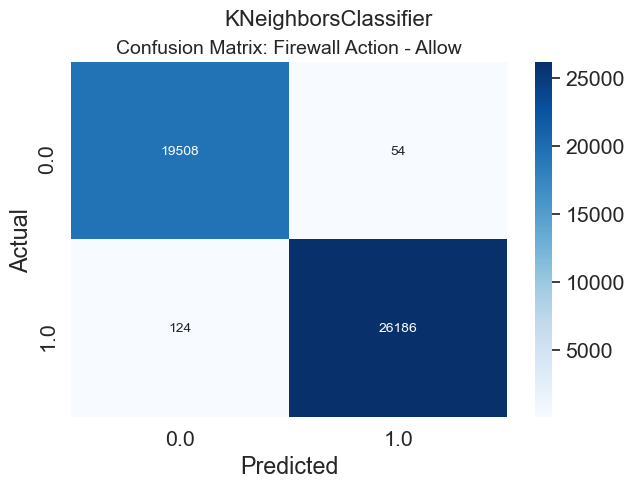

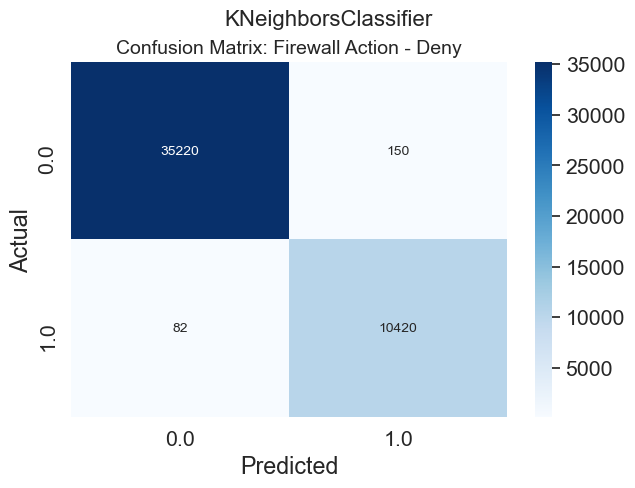

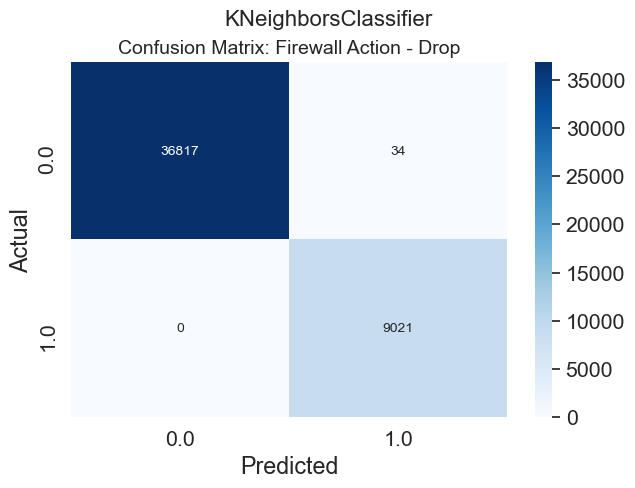

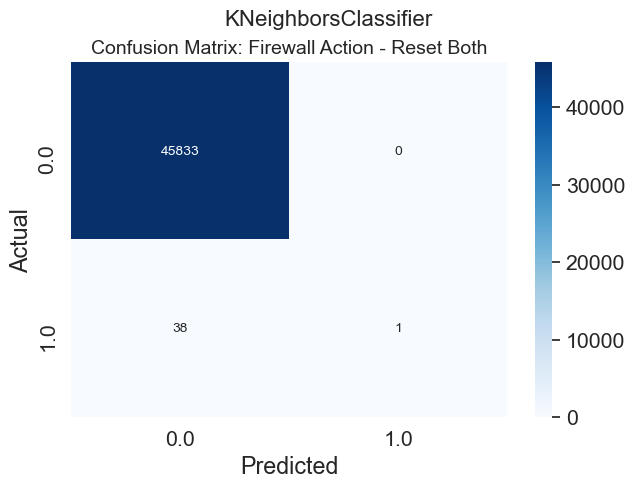

In [157]:
# Plotting the confusion matrix to determine the accuracy and recall
from sklearn.metrics import confusion_matrix as CM
from sklearn.metrics import multilabel_confusion_matrix as MCM

action_labels=["allow","deny","drop","reset-both"]

c_matrix = MCM(y_train, y_action_predict)

import seaborn as sn
def plot_confusion_matrix(cfm, y_test, caller, algor_name):
    # plot confusion_matrix
    df_cm = pd.DataFrame(cfm, columns=np.unique(y_test), index = np.unique(y_test))
    df_cm.index.name = 'Actual'
    df_cm.columns.name = 'Predicted'
    fig = plt.figure()
    plt.title('Confusion Matrix: ' + caller, fontsize=14)
    plt.suptitle(algor_name, fontsize=16)
    plt.style.use('default')
    fig.tight_layout(rect=[0, 0.03, 1, 0.95])
    sn.set(font_scale=1.4)
    sn.heatmap(df_cm, cmap="Blues", annot=True, fmt='g', annot_kws={"size": 10})
    plt.show()

plot_confusion_matrix(c_matrix[0], y_train[0], 'Firewall Action - Allow', type(action_model).__name__)
plot_confusion_matrix(c_matrix[1], y_train[1], 'Firewall Action - Deny', type(action_model).__name__)
plot_confusion_matrix(c_matrix[2], y_train[2], 'Firewall Action - Drop', type(action_model).__name__)
plot_confusion_matrix(c_matrix[3], y_train[3], 'Firewall Action - Reset Both', type(action_model).__name__)


In [55]:
# Conducting performance measure on the model
from sklearn.metrics import precision_score, recall_score, f1_score 

print("Precision\t= {:.4f}".format(precision_score(y_train,y_action_predict,average="weighted")))
print("Recall\t\t= {:.4f}".format(recall_score(y_train,y_action_predict,average="weighted")))
print("F1 Score\t= {:.4f}".format(f1_score(y_train,y_action_predict,average="weighted")))

Precision	= 0.9948
Recall		= 0.9947
F1 Score	= 0.9944


In [121]:
# Cross validation of data
from sklearn.model_selection import cross_val_score as CVS
from sklearn.model_selection import cross_val_predict as CVP
from sklearn.metrics import mean_squared_error as MSE

y_scores = CVS(action_model, X_test, y_test, cv=5)
print("5-fold cross validation scores: ",y_scores)

y_scores_cv = CVP(action_model, X_train, y_train, cv=5, method="predict")
print("\nCross Validation Predictions:\n",y_scores_cv)


5-fold cross validation scores:  [0.99186165 0.99186165 0.99059003 0.98957274 0.99262462]

Cross Validation Predictions:
 [[0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 ...
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]]


Average precision score, micro-averaged over all classes: 0.99


Text(0.5, 1.0, 'Average precision score, micro-averaged over all classes: AP=0.99')

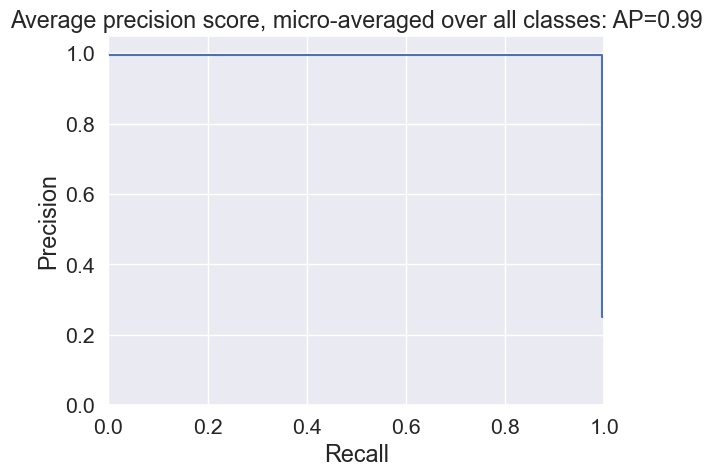

In [144]:
# Plotting of PR Graph that support multiclass
from sklearn.multiclass import OneVsRestClassifier as OvsR
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import average_precision_score

# Using OneVsRestClassifier for multi-label prediction
clf = OvsR(KNClf())
clf.fit(X_train, y_train)
y_prob = clf.predict(X_train)

# For each class
precision = dict()
recall = dict()
average_precision = dict()
for i in range(y.shape[1]):
    precision[i], recall[i], _ = precision_recall_curve(np.array(y_train)[:, i], y_prob[:, i])
    average_precision[i] = average_precision_score(np.array(y_train)[:, i], y_prob[:, i])

# A "micro-average": quantifying score on all classes jointly
precision["micro"], recall["micro"], _ = precision_recall_curve(np.array(y_train).ravel(), y_prob.ravel())
average_precision["micro"] = average_precision_score(y_train, y_prob, average="micro")
print('Average precision score, micro-averaged over all classes: {0:0.2f}'.format(average_precision["micro"]))

plt.figure()
plt.step(recall['micro'], precision['micro'], where='post')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Average precision score, micro-averaged over all classes: AP={0:0.2f}'.format(average_precision["micro"]))

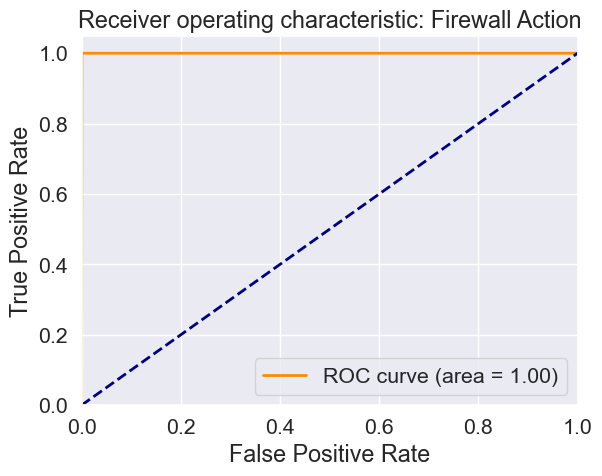

In [149]:
# Plotting of ROC Graph that supports multiclass
from sklearn.metrics import roc_curve, auc

y_prob = clf.predict(X_train)

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(y.shape[1]):
    fpr[i], tpr[i], _ = roc_curve(np.array(y_train)[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(np.array(y_train).ravel(), y_prob.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot of a ROC curve for a specific class

plt.figure()
lw = 2
plt.plot(fpr[2], tpr[2], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic: Firewall Action')
plt.legend(loc="lower right")
plt.show()



In [150]:
# Area Under the Graph
from sklearn.metrics import roc_auc_score as RAS

auc = RAS(y_train, y_prob)
print('AUC = {:.4f}'.format(auc))

AUC = 0.8756


After plotting both graphs, we can now evaluate and fine-tune the alogrithm.

In [130]:
# Data algorithm fine tuning
from sklearn.model_selection import GridSearchCV
from sklearn.calibration import CalibratedClassifierCV as Cal_CCV

calibrated_knn = KNClf()
param_grid = {
    'n_neighbors': [1,3,5,7],
    'p':[1,2],
    'weights':['uniform','distance'],
}
search = GridSearchCV(calibrated_knn, param_grid, cv=5,scoring = 'roc_auc')

print("Initializing grid search...\n")
search.fit(X_train, y_train)
print("Grid Search completed.")


Initializing grid search...

Grid Search completed.


In [131]:
# Evaluating the best model
best_model = search.best_estimator_
print("Best model:\t",best_model)

Best model:	 KNeighborsClassifier(p=1)


As shown, the KNN Classifier best's model hyperparameter is differ from the default.<br>

In [132]:
print('Best hyperparameter settings:', search.best_params_)

Best hyperparameter settings: {'n_neighbors': 5, 'p': 1, 'weights': 'uniform'}


Thus we can now evaluate our new model on the test set.

In [133]:
print("Testing Sets:","\nX:\t",X_test.shape,"\ny:\t",y_test.shape)

Testing Sets: 
X:	 (19660, 11) 
y:	 (19660, 4)


In [148]:
# Prediciton on testing sets ( unseen data )
y_action_predict_final = best_model.predict(X_test)

clf_final = OvsR(KNClf(p=1))
clf_final.fit(X_test, y_test)
y_action_predict_final = clf.predict(X_test)

auc_final = RAS(y_test, y_action_predict_final)
print('KNN Classifier AUC = {:.4f}'.format(auc_final))

KNN Classifier AUC = 0.8722


Testing set AUC is usually slightly worse than the validation data as it is fine-tuned to the validation set.

-- End of Algorithm --